# Assignment 1

## Part 1

**a: In your opinion, what were the most important turning points in the history of deep learning?**

There have been many important turning points in the history of deep learning. From the development of the first artificial neuron in the 1940s to today, a lot has happened. 
To me personally, the most important turning points have been the advancements in visual recognition. 
This is a key moment where deep learning began to show a clear advantage over traditional machine learning.

**b: Explain the ADAM optimizer.**

The typical optimizer uses some form of gradient descent to find a minimum loss. Problems occur when there are local minima along this path. 
The algorithm might get stuck and never optimize for minimal loss. Momentum is a way to reduce this problem. The momentum algorithm remembers the direction of previous iterations and pushes in that direction. 
Another technique that accelerates convergence is by adjusting the learning rate. 
This is known as the adaptive gradient algorithm, where the learning rate becomes smaller over time as it's divided by the sum of all previous gradients.

The ADAM optimizer combines both of these features, making it one of the fastest optimizers to converge and, therefore, quite convenient. However, studies have shown that standard SGD with momentum can perform better overall.

**c: Assume data input is a single 30x40 pixel image. First layer is a convolutional layer with 5 filters, with kernel size 3x2, step size (1,1) and padding='valid'. What are the output dimensions?**

Since the padding is valid, it means that we wont add a padding around the image. The step size is (1,1), so the kernel will only move one step at the time. We have 5 filters, whih means that there will be 5 dimensions. 
$$
  \text{Output Height} = \frac{\text{Input Height} - \text{Kernel height}}{\text{Stide Height}} + 1
$$

$$
  \text{Output Width} = \frac{\text{Input Width} - \text{Kernel Width}}{\text{Stide Width}} + 1
$$

Following these equations, the output dimensions will be 28x39x5, since we have no padding.


**d: Assuming ReLU activations and offsets, and that the last layer is softmax, how many parameters does this network have:**

<img src="data\diagram.png" alt="image" width="700" height="400">

The inputer layer is 5 and we have 3 hidden layers of size 5 and an output layer of 3. The number of parameters will be:

$$
  \text{Parameters} = (5 \cdot 5 + 5) + (5 \cdot 5 + 5) + (5 \cdot 5 + 5) + (5 \cdot 3 + 3) = 3 \cdot 30 + 18 = 108
$$

**e: For a given minibatch, the targets are [1,4, 5, 8] and the network output is [0.1,4.4,0.2,10]. If the loss function is "torch.nn.HuberLoss(reduction='mean', delta=1.0)", what is the loss for this minibatch?**

For a batch of size $N$, the unreduced loss can be described as:

$$
L=\left\{l_1, \ldots, l_N\right\}^T
$$

with

$$
l_n= \begin{cases}\frac{1}{2}\left(x_n-y_n\right)^2, & \text { if }\left|x_n-y_n\right|<\delta \\ \delta\left(\left|x_n-y_n\right|-\frac{1}{2}\delta\right), & \text { otherwise }\end{cases}
$$


If reduction is not none, then:

$$
\ell(x, y)= \begin{cases}\operatorname{mean}(L), & \text { if reduction }=\text { 'mean' } \\ \operatorname{sum}(L), & \text { if reduction }=\text { 'sum' }\end{cases}
$$

This will give the result of:

$$
L = \left\{\frac{1}{2}(1-0.1)^2,\frac{1}{2}(4-4.4)^2, \delta\left(\left|5-0.2\right|-\frac{1}{2}\delta\right), \delta\left(\left|8-10\right|-\frac{1}{2}\delta\right)\right\}^T
$$

$$
L = \left\{0.405, 0.08, 4.3, 1.5\right\}^T
$$

$$
\ell(x, y)=\frac{0.405 + 0.08 + 4.3 + 1.5}{4} = \frac{6.285}{4} = 1.57125
$$

The loss of the minibatch will be 1.57125


# Part 2: Writing a PyTorch dataset

In [1]:
import os
import pandas as pd
from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
import torch
import matplotlib.pyplot as plt
import numpy as np
from torch import nn

In [2]:
class InsectsDataset(Dataset):
    def __init__(self, csv_file, image_folder, root_dir, transform=None):
        """
        Args:
            root_dir (string): Directory with csv and image folder.
            csv_file (string): Path to the csv file with filenames and species.
            image_folder (string): Directory with images.
            transform (callable, optional): Optional transform to be applied on a sample.
        """
        self.root_dir = root_dir
        self.image_folder = image_folder
        csv_path =  os.path.join(self.root_dir, csv_file)
        self.insects_df = pd.read_csv(csv_path)
        self.transform = transform
        
        # Create a dictionary with the species as keys and a unique index as values
        self.species_to_label = {species: idx for idx, species in enumerate(self.insects_df['species'].unique())}
        self.label_to_species = {idx: species for species, idx in self.species_to_label.items()}

    def __len__(self):
        return len(self.insects_df)
    
    def __getitem__(self, idx):
        # Get the image file path
        img_name = os.path.join(self.root_dir, self.image_folder, self.insects_df.iloc[idx, 2])  #'filename' is the third column
        image = Image.open(img_name)
        
        # Get the species label
        species = self.insects_df.iloc[idx, 1]  # assuming 'species' is the second column
        label = self.species_to_label[species]
        
        # Apply transformations if needed
        if self.transform:
            image = self.transform(image)
        
        return image, label

transform = transforms.Compose([
    transforms.Resize((520, 520)), # Resizing the image to 520x520
    transforms.ToTensor()
])

dataset = InsectsDataset(csv_file='insects.csv',image_folder = "Insects", root_dir='data/', transform=transform)

print(dataset.species_to_label)
print(dataset.label_to_species)

{'Andrena fulva': 0, 'Panurgus banksianus': 1, 'Lasioglossum punctatissimum': 2}
{0: 'Andrena fulva', 1: 'Panurgus banksianus', 2: 'Lasioglossum punctatissimum'}


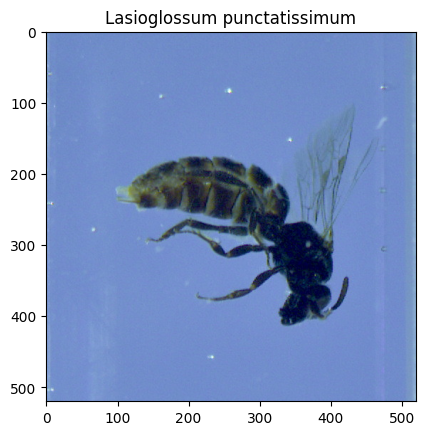

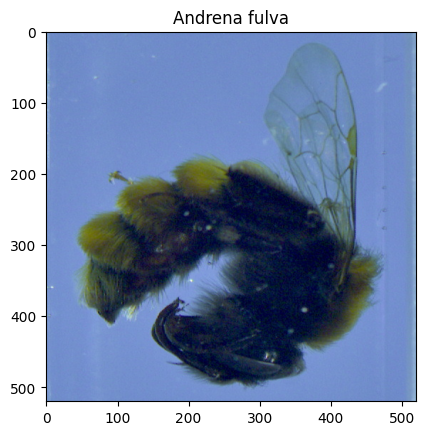

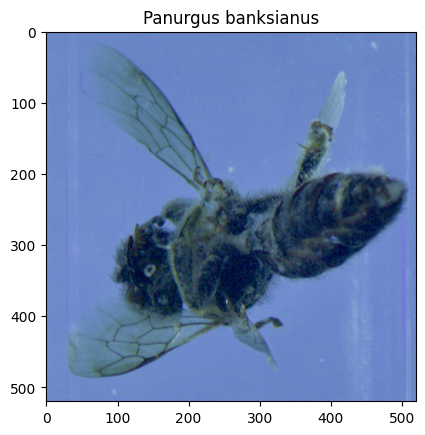

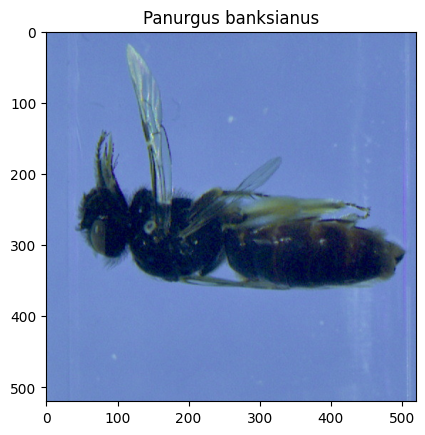

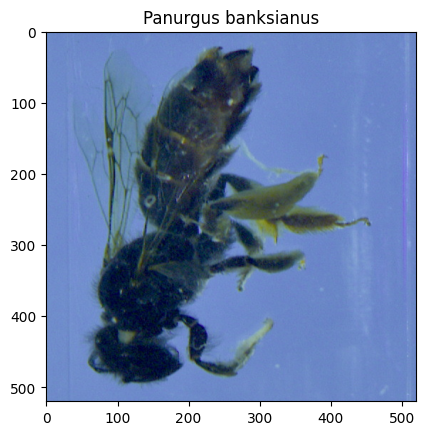

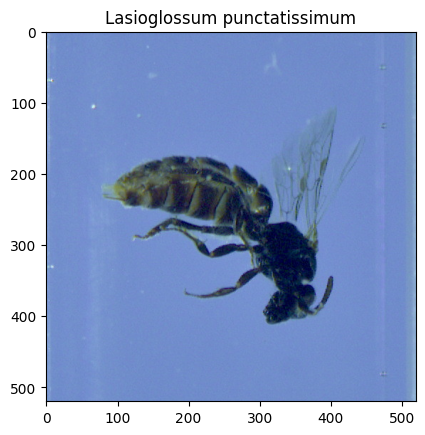

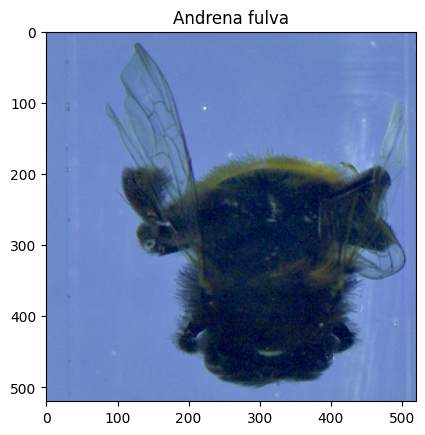

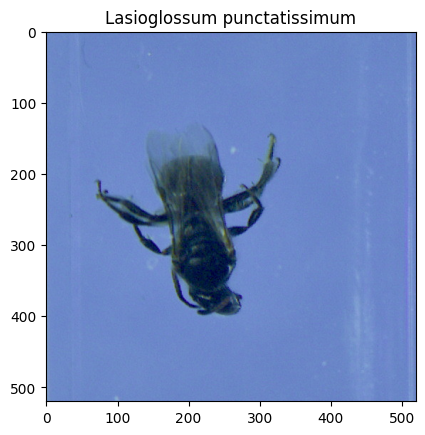

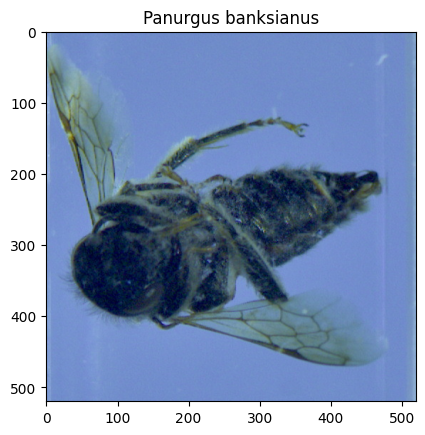

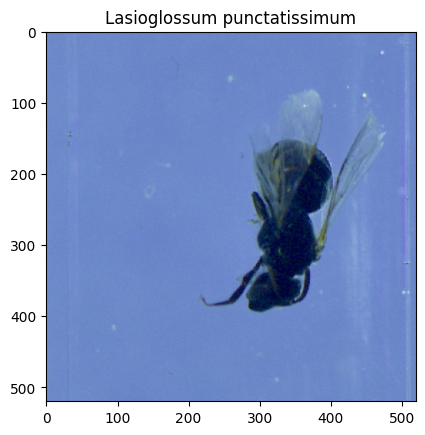

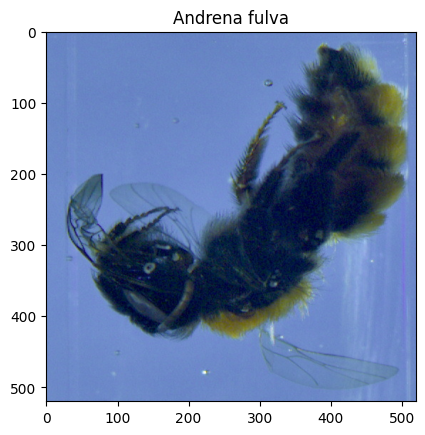

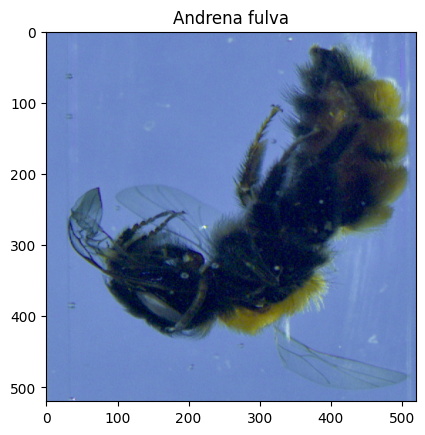

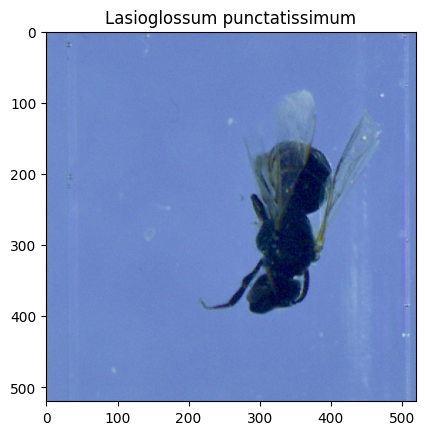

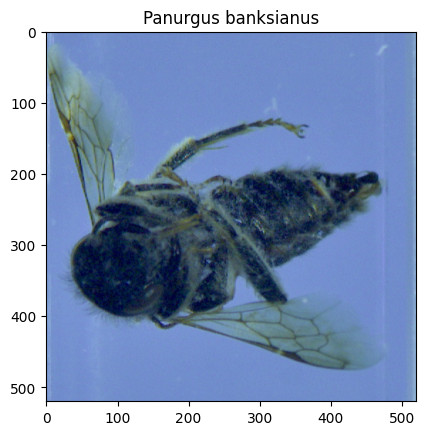

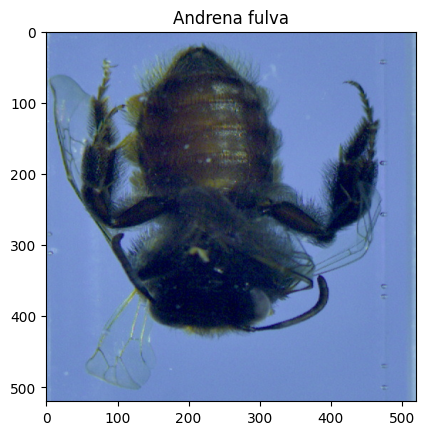

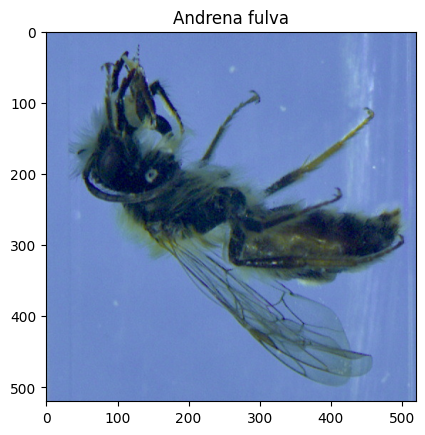

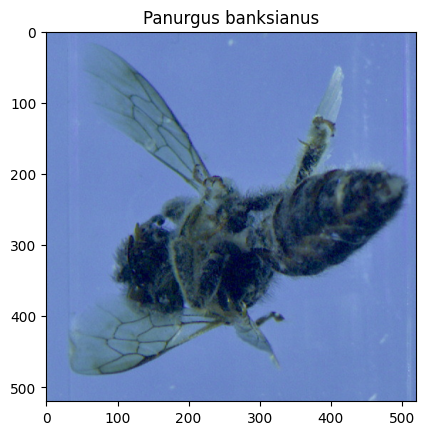

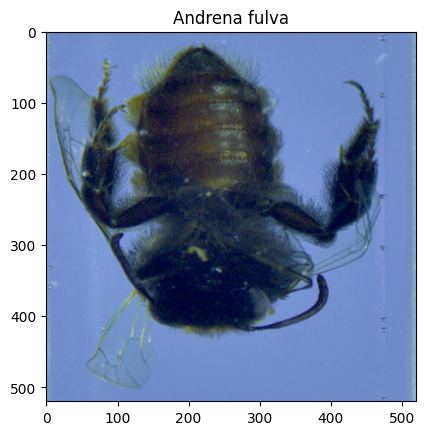

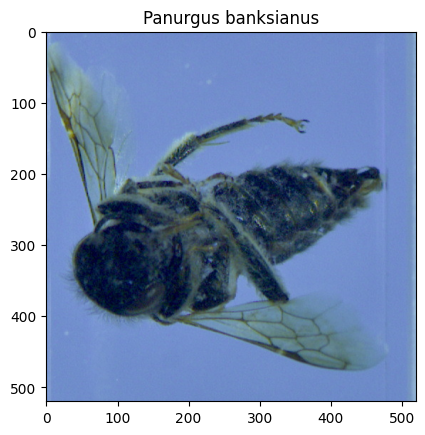

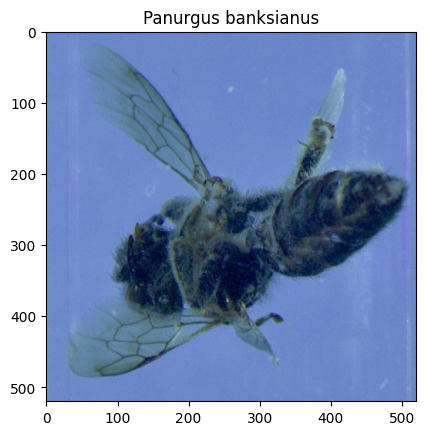

In [3]:
batch_size = 4

# Set up the dataset.
dataset = dataset

# Set up the dataset.
trainloader = torch.utils.data.DataLoader(dataset,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          num_workers=0)

# get some images
dataiter = iter(trainloader)
images, labels = next(dataiter)


for i in range(5): #Run through 5 batches
    images, labels = next(dataiter)
    for image, label in zip(images,labels): # Run through all samples in a batch
        plt.figure()
        plt.imshow(np.transpose(image.numpy(), (1, 2, 0)))
        plt.title(dataset.label_to_species[label.item()])


# Part 3:

In [4]:
import plotly.graph_objects as go

class TwoDimensionalData:
    def __init__(self, train_csv, test_csv, root_dir):
        """
        Args:
            root_dir (string): Directory with csv
            csv_file (string): Path to the csv file with filenames and species.
        """
        self.root_dir = root_dir
        train_path =  os.path.join(self.root_dir, train_csv)
        test_path =  os.path.join(self.root_dir, test_csv)
        self.train_df = pd.read_csv(train_path, sep=";")
        self.test_df = pd.read_csv(test_path, sep=";")

    def plot_data(self,df, title="Data Plot"):
        # Plot x,y with with color based on the Class with matplotlib
        # Use the color_map to assign colors to the classes
        color_map = {0: 'red', 1: 'blue', 2: 'green', 3: 'purple', 4: 'orange'}
        plt.figure()
        for class_value, color in color_map.items():
            plt.scatter(df[df['Class'] == class_value]['X'], df[df['Class'] == class_value]['Y'], c=color, label=f'Class {class_value}')
        plt.title(title)
        plt.xlabel('X Axis')
        plt.ylabel('Y Axis')
        plt.legend()
        plt.show()

    def get_data_to_tensor(self, df):
        # Convert the data to a tensor
        data = torch.tensor(df[['X', 'Y']].values, dtype=torch.float32)
        labels = torch.tensor(df['Class'].values, dtype=torch.long)
        return data, labels
twoD = TwoDimensionalData('train_data.csv', 'test_data.csv', 'data/')

**a: describe & visualize the data**

The data looks like a Spiral galaxy, with five arms. Each of the arms have a different class. The data is plotted below.


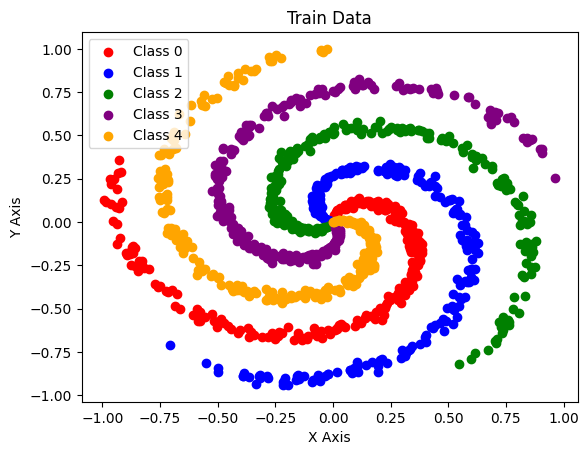

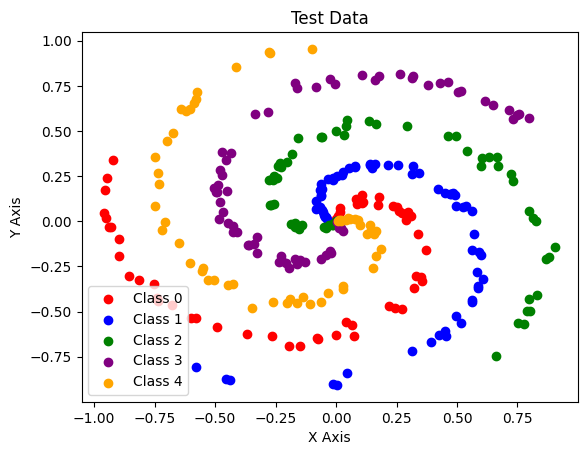

In [5]:
twoD.plot_data(twoD.train_df, "Train Data")
twoD.plot_data(twoD.test_df, title="Test Data")

**b: design a neural network using pytorch to correctly assign labels**

In [9]:
class NNclassifier(nn.Module):
    def __init__(self, input_size, num_classes):
        super(NNclassifier, self).__init__()
        # Linear layers
        self.fc1 = nn.Linear(input_size, 256)
        self.fc2 = nn.Linear(256, 64)
        self.fc3 = nn.Linear(64, num_classes)

        # Activation function
        self.relu = nn.ReLU()

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        return out
    
# Hyperparameters
input_size = 2
num_classes = 5
batch_size = 32
learning_rate = 0.001

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load the data
dataset = TwoDimensionalData('train_data.csv', 'test_data.csv', 'data/')
train_data, train_labels = dataset.get_data_to_tensor(dataset.train_df)
test_data, test_labels = dataset.get_data_to_tensor(dataset.test_df)

train_dataset = torch.utils.data.TensorDataset(train_data, train_labels)
test_dataset = torch.utils.data.TensorDataset(test_data, test_labels)

train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

# Initialize the neural network
model = NNclassifier(input_size, num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

class trainNN:
    train_losses = []
    test_losses = []
    train_accuracies = []
    test_accuracies = []
    accuracy = []
    convergence = False

    def __init__(self, model, train_dataloader, test_dataloader, criterion, optimizer, num_epochs):
        self.model = model
        self.train_dataloader = train_dataloader
        self.test_dataloader = test_dataloader
        self.criterion = criterion
        self.optimizer = optimizer
        self.num_epochs = num_epochs
    
    def _train(self, dataloader, model, loss_fn, optimizer):
        size = len(dataloader.dataset)
        model.train()
        total_loss, correct = 0, 0  # Track the total loss for the epoch

        for _, (X, y) in enumerate(dataloader):
            X, y = X.to(device), y.to(device)

            # Compute prediction error
            pred = model(X)
            loss = loss_fn(pred, y)
            total_loss += loss.item()  # Accumulate loss

            # Backpropagation
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

            # Calculate accuracy
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

        avg_loss = total_loss / len(dataloader)  # Calculate average loss for the epoch
        avg_accuracy = correct / size

        self.train_losses.append(avg_loss)  # Store the average loss for the epoch
        self.train_accuracies.append(avg_accuracy) # Store the average accuracy for the epoch
        print(f"Train loss: {avg_loss:>7f}, Accuracy: {(100*avg_accuracy):>0.1f}%")
    
    def _test(self, dataloader, model, loss_fn):
        size = len(dataloader.dataset)
        num_batches = len(dataloader)
        model.eval()
        test_loss, correct = 0, 0
        with torch.no_grad():
            for X, y in dataloader:
                X, y = X.to(device), y.to(device)
                pred = model(X)
                test_loss += loss_fn(pred, y).item()
                correct += (pred.argmax(1) == y).type(torch.float).sum().item()
        test_loss /= num_batches
        correct /= size
        self.test_losses.append(test_loss)  # Store the test loss for the epoch
        self.test_accuracies.append(correct)

        print(f"Test Error: \nAvg loss: {test_loss:>8f}, Accuracy: {(100*correct):>0.1f}% \n")
        return float(correct*100)
    
    def _plot_training_result(self):
        plt.subplot(2,1,1)
        plt.plot(range(1, self.num_epochs+1), self.train_losses, label="Train Loss")
        plt.plot(range(1, self.num_epochs+1), self.test_losses, label="Test Loss")
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.title("Training and Testing Loss over Epochs")
        plt.grid()
        plt.legend()
        plt.show()

        plt.subplot(2,1,2)
        plt.plot(range(1, self.num_epochs+1), self.train_accuracies, label="Train Accuracy")
        plt.plot(range(1, self.num_epochs+1), self.test_accuracies, label="Test Accuracy")
        plt.xlabel("Epochs")
        plt.ylabel("Accuracy")
        plt.title("Training and Testing Accuracy over Epochs")
        plt.grid()
        plt.legend()
        plt.show()
   
    def train_model(self):
        accuracy = []
        convergence = False
        for t in range(self.num_epochs):
            print(f"Epoch {t+1}\n-------------------------------")
            self._train(self.train_dataloader, self.model, self.criterion, self.optimizer)
            acc = self._test(self.test_dataloader, self.model, self.criterion)
            accuracy.append(acc)
            # Check for convergence, meaning the test loss has not decreased for 10 epochs
            if t > 21 and self.test_losses[-1] > np.mean(self.test_losses[-21:-1]) and not convergence:
                convergence = True
            if convergence and accuracy[-1] == np.max(accuracy):
                self.num_epochs = t + 1
                break
        print("Done!")
        self._plot_training_result()

Epoch 1
-------------------------------
Train loss: 1.513741, Accuracy: 30.8%
Test Error: 
Avg loss: 1.426253, Accuracy: 26.8% 

Epoch 2
-------------------------------
Train loss: 1.376224, Accuracy: 29.5%
Test Error: 
Avg loss: 1.319149, Accuracy: 31.4% 

Epoch 3
-------------------------------
Train loss: 1.290807, Accuracy: 35.8%
Test Error: 
Avg loss: 1.215921, Accuracy: 37.5% 

Epoch 4
-------------------------------
Train loss: 1.187513, Accuracy: 40.2%
Test Error: 
Avg loss: 1.113398, Accuracy: 45.8% 

Epoch 5
-------------------------------
Train loss: 1.077602, Accuracy: 51.7%
Test Error: 
Avg loss: 0.993658, Accuracy: 61.2% 

Epoch 6
-------------------------------
Train loss: 0.957175, Accuracy: 64.8%
Test Error: 
Avg loss: 0.874306, Accuracy: 68.9% 

Epoch 7
-------------------------------
Train loss: 0.852890, Accuracy: 70.5%
Test Error: 
Avg loss: 0.770114, Accuracy: 74.9% 

Epoch 8
-------------------------------
Train loss: 0.756414, Accuracy: 73.3%
Test Error: 
Avg lo

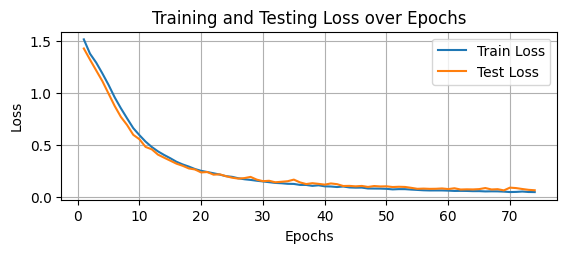

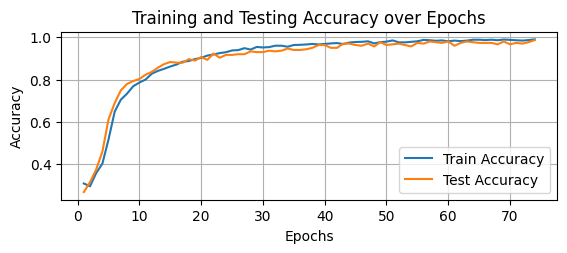

In [10]:
test = trainNN(model, train_dataloader, test_dataloader, criterion, optimizer, 1000)
test.train_model()

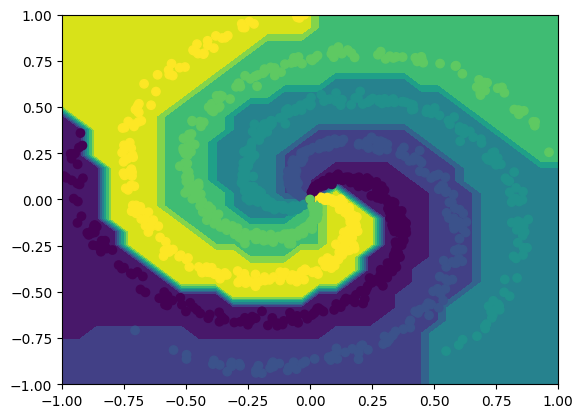

In [8]:
x,y = np.meshgrid(np.linspace(-1,1,30),np.linspace(-1,1,30))
xy = np.concatenate((x.reshape(-1,1),y.reshape(-1,1)),axis=1)
z = model(torch.tensor(xy).float()).detach().numpy()
z = np.argmax(z,1).reshape(30,30)
plt.contourf(x,y,z)
plt.scatter(train_data[:,0],train_data[:,1],c=train_labels)